# Chapter 07 선형회귀의 기초

04 경사하강법으로 선형회귀 풀기

2 경사하강법 알고리즘

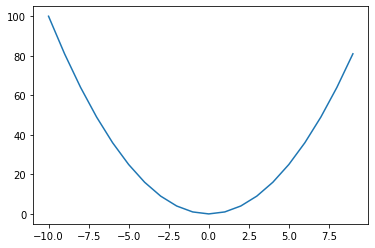

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

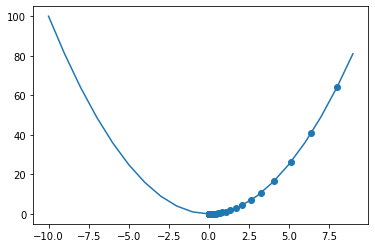

In [2]:
x_new = 10
derivative = []
y = []
learng_rate = 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate * 2 * old_value
    y.append(x_new ** 2)
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

05 선형회귀 성능 측정하기

1 훈련/테스트 분할

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5,2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

2 선형회귀의 성능 측정 지표

2.1 MAE

In [5]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

2.2 RMSE

In [6]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

2.3 결정계수

In [7]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

06 코드로 선형회귀 구현하기

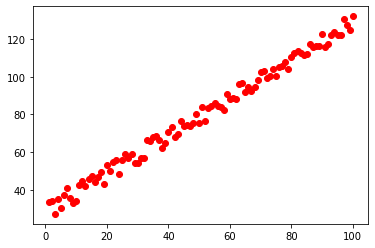

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape = (numPoints, 2))
    y = np.zeros(shape = numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = 1     #데이터 x의 상수항에는 1
        x[i][1] = i     #데이터 x 값은 1씩 증가시킴
        y[i] = (i+bias) + random.uniform(0,1) * variance
        #데이터 y에 bias 생성
    return x, y
x, y = gen_data(100, 25, 10)     #100개의 데이터 생성

plt.plot(x[:,1] + 1, y, "ro")     #데이터 x와 y의 상관관계 그래프 작성
plt.show()

In [12]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    cost_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2*m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
        if i % 250 == 0:
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list

m, n = np.shape(x)
numIterations = 5000
alpha = 0.0005
theta = np.ones(n)

theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations)

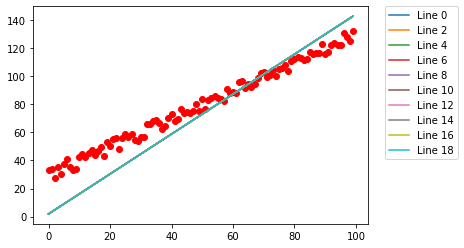

In [17]:
y_predict_step = np.dot(x, theta_list.transpose())
plt.plot(x[:,1], y, "ro")
for i in range(0, 20, 2):
    plt.plot(x[:,1], y_predict_step[:,1], label = 'Line %d'%i)
    
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

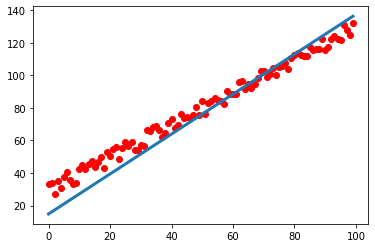

In [18]:
y_predict = np.dot(x, theta)
plt.plot(x[:,1], y, "ro")
plt.plot(x[:,1], y_predict, lw = 3)
plt.show()

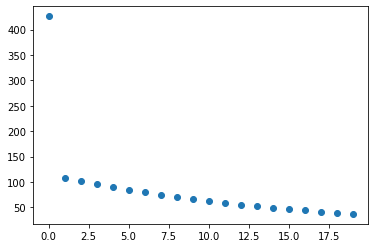

In [19]:
iterations = range(len(cost_list))

plt.scatter(iterations, cost_list)
plt.show()